# L3 Data Visualization Notebook

This report comprises the entire Data Visualization of the L3 data (Level 3 Data)  of the Hotel Recommendation system built. 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [13]:
# # Set up boto3 client (this step is optional and not necessary for using s3fs directly)
# s3_client = boto3.client('s3', region_name='us-west-2')

# # Define bucket and object key
# bucket_name = 'andorra-hotels-data-warehouse'
# object_key = 'l3_data/text/lsth.parquet'

# # Construct the S3 file path
# s3_file_path = f's3://{bucket_name}/{object_key}'

# Load the Parquet file into a pandas DataFrame
s3_file_path = "../output/l3_data_2024-09-01_10-02-26.parquet"
df = pd.read_parquet(s3_file_path, engine='pyarrow')

# Display the first few rows of the DataFrame
# df_head = data.head()
# df_head.style.hide()

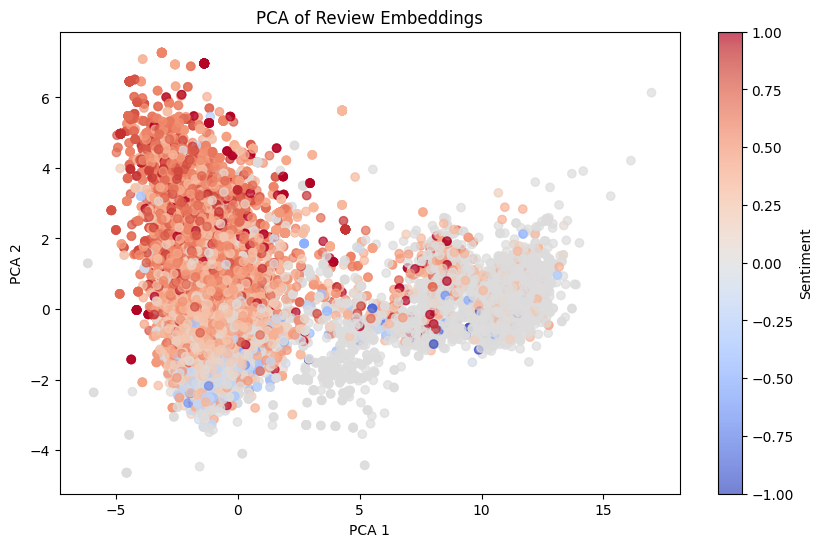

In [6]:
# 4. Embedding Visualization with PCA
embeddings = pd.DataFrame(df['embedding'].to_list())
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['sentiment'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Sentiment')
plt.title('PCA of Review Embeddings')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

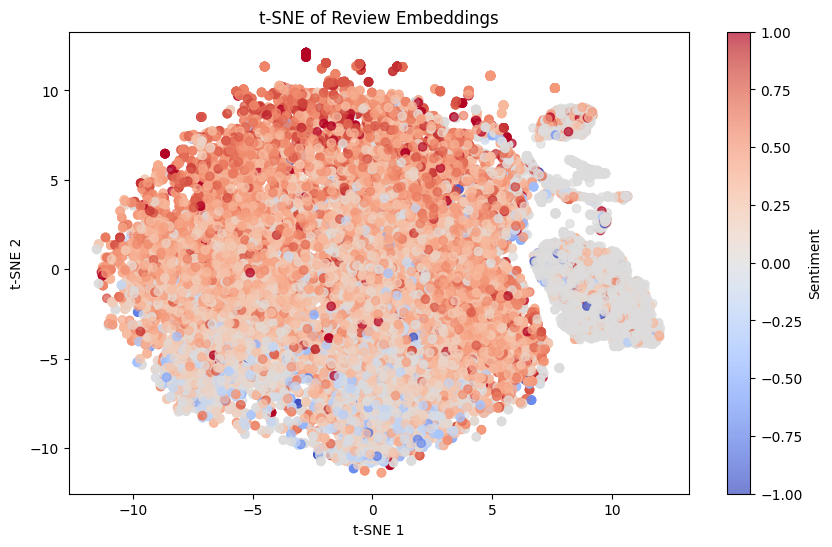

In [24]:
# 5. Embedding Visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['sentiment'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Sentiment')
plt.title('t-SNE of Review Embeddings')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


In [14]:
import ast
import numpy as np

def extract_features(text_features):
    if isinstance(text_features, str):
        try:
            features_dict = ast.literal_eval(text_features)
        except ValueError:
            raise ValueError(f"Cannot parse the string: {text_features}")
    elif isinstance(text_features, dict):
        features_dict = text_features
    else:
        raise ValueError(f"Unexpected data type: {type(text_features)}")
    
    feature_type = features_dict.get('type', None)
    size = features_dict.get('size', None)
    indices = features_dict.get('indices', [])
    values = features_dict.get('values', [])
    
    if isinstance(indices, np.ndarray):
        indices = indices.tolist()
    if isinstance(values, np.ndarray):
        values = values.tolist()
    
    return feature_type, size, indices, values


# Apply the function to extract type, size, indices, and values
df['review_text_type'], df['review_text_size'], df['review_text_indices'], df['review_text_values'] = zip(*df['review_text_features'].apply(extract_features))

# # Convert boolean columns to integers (1 or 0)
# df = df.copy()
# bool_columns = df.select_dtypes(include=['bool']).columns
# df[bool_columns] = df[bool_columns].astype(int)

# # Expand indices into separate columns
# max_len_indices = df['indices'].apply(len).max()
# max_len_values = df['values'].apply(len).max()

# for i in range(max_len_indices):
#     df[f'review_text_index_{i}'] = df['indices'].apply(lambda x: x[i] if i < len(x) else 0)

# for i in range(max_len_values):
#     df[f'review_text_value_{i}'] = df['values'].apply(lambda x: x[i] if i < len(x) else 0)

# # Drop the original 'indices' and 'values' columns
# df = df.drop(['indices', 'values'], axis=1)
# df


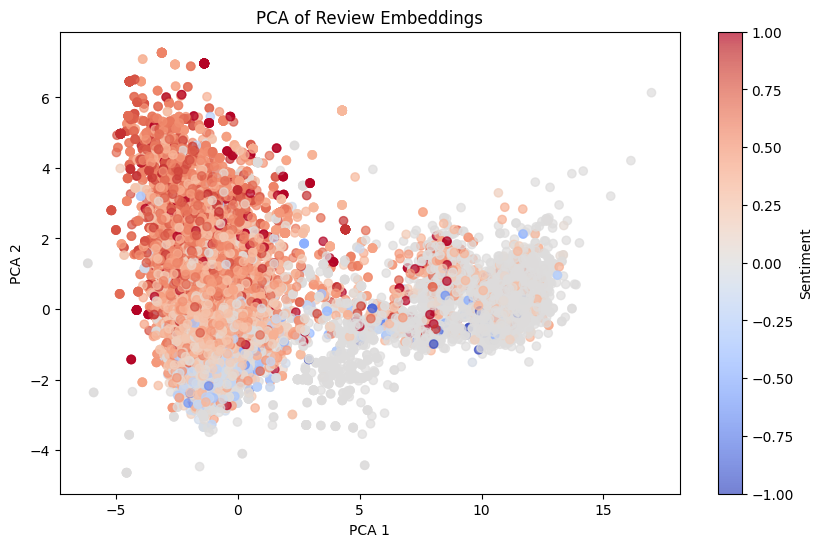

In [8]:
# 6. Review Text Indexes Visualization with PCA
indices = pd.DataFrame(df['review_text_indices'].to_list())
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['sentiment'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Sentiment')
plt.title('PCA of Review Indexes')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [9]:
# 7. Review Text Indexes Visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(indices)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['sentiment'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Sentiment')
plt.title('t-SNE of Review Embeddings')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

ValueError: Input X contains NaN.
TSNE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

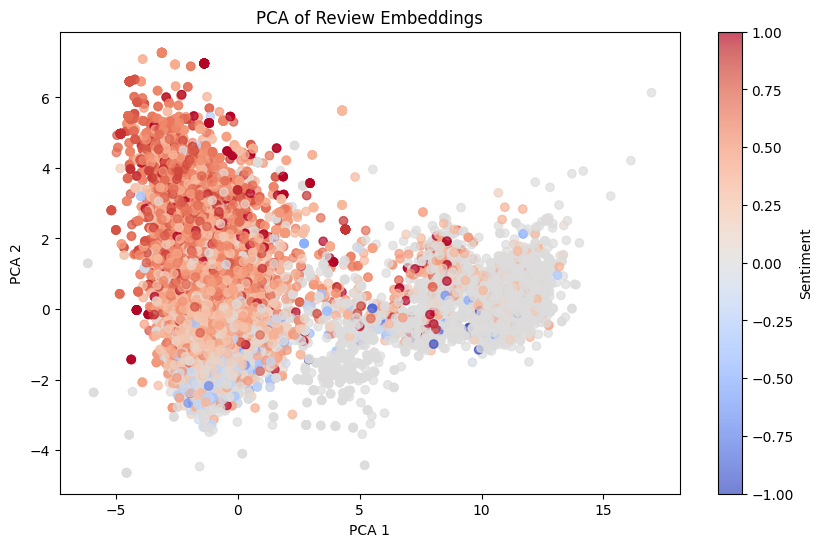

In [10]:
# 8. Review Text Values Visualization with PCA
values = pd.DataFrame(df['review_text_values'].to_list())
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['sentiment'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Sentiment')
plt.title('PCA of Review Values')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [11]:
# 9. Review Text Values Visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(values)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['sentiment'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Sentiment')
plt.title('t-SNE of Review Embeddings')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

ValueError: Input X contains NaN.
TSNE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [25]:
# 6. Correlation Heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

ValueError: setting an array element with a sequence.

## 1. NLP: Review Text Features

The plot that visualizes the distribution of values for each feature extracted from the `review_text_features` column in the dataset. 
Each subplot represents the distribution of one of the features across all reviews, showing how frequently each value occurs.

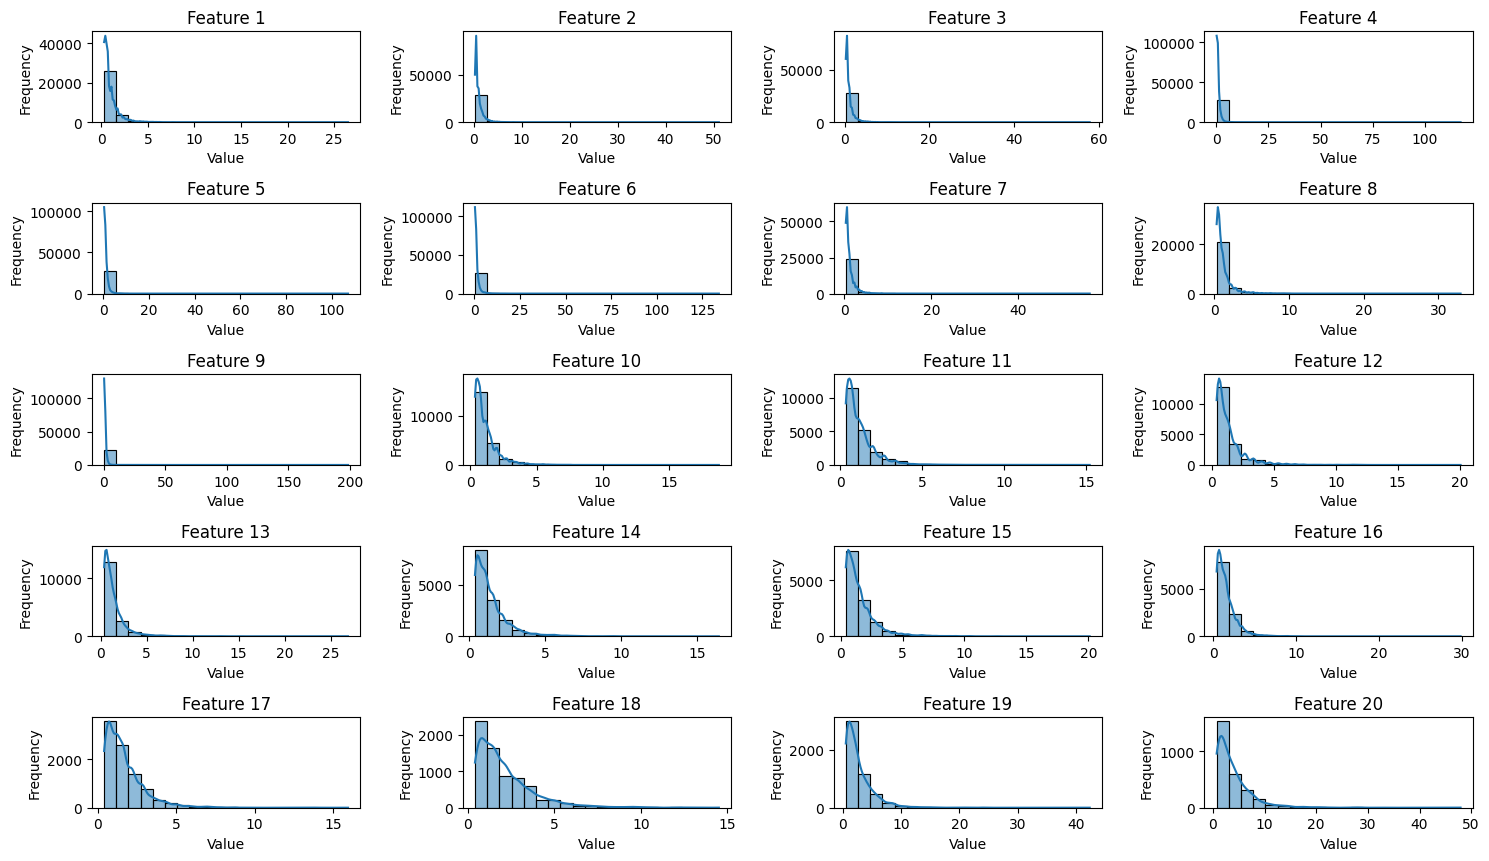

In [27]:
# Extract the review text features
def extract_review_text_features(row):
    try:
        features = row['review_text_features']
        return features['values']
    except (TypeError, KeyError):
        return []

df['review_text_values'] = df.apply(extract_review_text_features, axis=1)

# Create a DataFrame for review text features
review_text_df = pd.DataFrame(df['review_text_values'].tolist())

# Plot the distribution of each feature
if not review_text_df.empty:
    num_features = review_text_df.shape[1]
    num_cols = 4
    num_rows = (num_features // num_cols) + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    # Flatten axes for easy iteration
    axes = axes.flatten()

    for i, column in enumerate(review_text_df.columns):
        sns.histplot(review_text_df[column], bins=20, kde=True, ax=axes[i])
        axes[i].set_title(f'Feature {i+1}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')

    # Remove empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("No data available in review_text_df")

## Step 1: Extract Features

First, ensure the embedding and review_text_values are extracted correctly.

In [17]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extracting the embeddings and review_text_values
embeddings = np.vstack(df['embedding'].values)


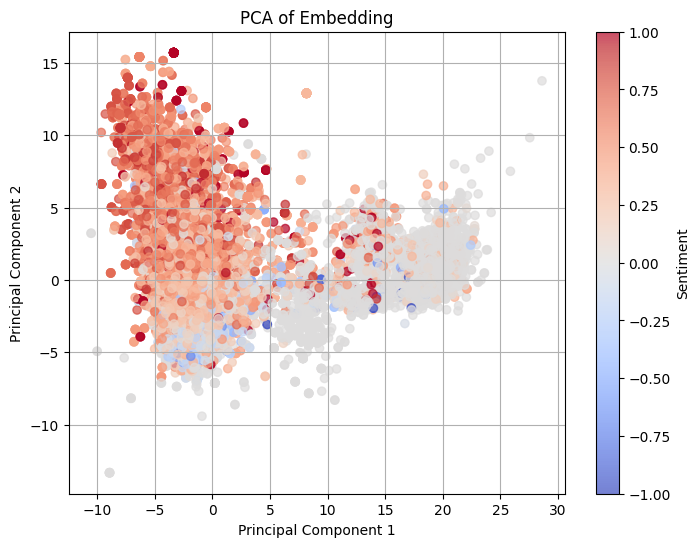

In [22]:
scaler_e = StandardScaler()
scaled_features_embeddings = scaler_e.fit_transform(embeddings)

# Apply PCA
pca_e = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca_e.fit_transform(scaled_features_embeddings)

# Convert the principal components to a DataFrame for easier plotting
pca_df_e = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(pca_df_e['PC1'], pca_df_e['PC2'], c=df['sentiment'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Sentiment')
plt.title('PCA of Embedding')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [25]:
review_text_values = df['review_text_values'].apply(lambda x: np.array(x)).values
review_text_values
review_text_values = np.vstack(review_text_values)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 13 and the array at index 2 has size 20

In [24]:
scaler_ti = StandardScaler()
scaled_features_tf_idf = scaler_ti.fit_transform(review_text_values)

# Apply PCA
pca_ti = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca_ti.fit_transform(scaled_features_tf_idf)

# Convert the principal components to a DataFrame for easier plotting
pca_df_ti = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(pca_df_ti['PC1'], pca_df_ti['PC2'], alpha=0.7)
plt.title('PCA of Embedding and Review Text Values')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

ValueError: setting an array element with a sequence.

In [ ]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF
from textblob import TextBlob
from gensim.models import Word2Vec
import numpy as np
from pyspark.sql import SparkSession

def initialize_spark():
    """
    Initialize Spark session with Hadoop AWS package for S3 access.
    """
    return SparkSession.builder \
        .appName("HotelDataProcessingL3") \
        .config("spark.jars.packages", "org.apache.hadoop:hadoop-aws:3.3.1") \
        .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
        .config("spark.hadoop.fs.s3a.aws.credentials.provider", "com.amazonaws.auth.DefaultAWSCredentialsProviderChain") \
        .config("spark.hadoop.fs.s3a.endpoint", "s3.amazonaws.com") \
        .getOrCreate()

def add_sentiment_analysis(l2_data):
    """
    Perform sentiment analysis on the review text.
    """
    def analyze_sentiment(text):
        return TextBlob(text).sentiment.polarity
    
    l2_data['sentiment'] = l2_data['review_text_translated'].apply(analyze_sentiment)
    return l2_data

def add_word_embeddings(l2_data):
    """
    Add word embeddings using Word2Vec, storing the embedding vector as a list in a single column.
    """
    # Tokenize text for word embeddings
    l2_data['tokenized_review'] = l2_data['review_text_translated'].apply(lambda x: x.split())

    # Train Word2Vec model on the tokenized reviews
    model = Word2Vec(sentences=l2_data['tokenized_review'], vector_size=100, window=5, min_count=1, workers=4)

    def get_average_embedding(tokens):
        vectors = [model.wv[word] for word in tokens if word in model.wv]
        if vectors:
            return np.mean(vectors, axis=0).tolist()  # Convert ndarray to list
        else:
            return [0.0] * model.vector_size  # Return a list of zeros if no valid words

    # Apply the embedding to each review and keep it as a single column
    l2_data['embedding'] = l2_data['tokenized_review'].apply(get_average_embedding)

    # Drop the 'tokenized_review' column as it's no longer needed
    l2_data = l2_data.drop(['tokenized_review'], axis=1)
    
    return l2_data

def process_nlp(l3_data):
    """
    Perform NLP tasks: Tokenization, stopword removal, and TF-IDF.
    """
    # Tokenize and remove stopwords
    tokenizer = Tokenizer(inputCol="review_text_translated", outputCol="words")
    l3_data = tokenizer.transform(l3_data)

    remover = StopWordsRemover(inputCol="words", outputCol="filtered")
    l3_data = remover.transform(l3_data)

    # Compute TF and IDF
    hashing_tf = HashingTF(inputCol="filtered", outputCol="raw_features", numFeatures=20)
    l3_data = hashing_tf.transform(l3_data)

    idf = IDF(inputCol="raw_features", outputCol="review_text_features")
    idf_model = idf.fit(l3_data)
    l3_data = idf_model.transform(l3_data)

    # Drop intermediate columns
    l3_data = l3_data.drop('words', 'filtered', 'raw_features', 'review_text_translated')

    return l3_data


# Initialize Spark session
spark = initialize_spark()

# Add Sentiment Analysis
l2_data = add_sentiment_analysis(l2_data)

# Add Word Embeddings
l2_data = add_word_embeddings(l2_data)

# Add NLP processing
l3_data = spark.createDataFrame(l2_data)
l3_data = process_nlp(l3_data)

# Stop the Spark cluster
spark.stop()